![Nuclio logo](https://nuclio.school/wp-content/uploads/2018/12/nucleoDS-newBlack.png)

## **ENTREGABLE 1:** Data Preparation - BMW Pricing
## **INTEGRANTES DEL GRUPO:** Lluís Miarnau, Ariadna Rubió, Sergio Vásquez y David Larré

____

## **INTRODUCCIÓN**

En este proyecto se trabajará con un dataset de vehículos BMW, el objetivo final es preparar el dataset para predecir el precio de los coches en función de diversas variables disponibles.

Se realizará una exploración, limpieza y transformación completa de los datos para prepararlos adecuadamente para el modelo predictivo.

## **COLUMNAS**

 Columna                          | Descripción |
|----------------------------------|-------------|
| **marca**                        | Marca del vehículo (en este caso, `BMW` o vacíos). |
| **modelo**                       | Modelo específico del coche (por ejemplo, `118`, `M4`, `320`...). |
| **km**                           | Kilómetros recorridos por el vehículo (indicador del uso). |
| **potencia**                     | Potencia del motor en caballos (CV). |
| **fecha_registro**               | Fecha en que se matriculó por primera vez el coche. |
| **tipo_gasolina**                | Tipo de combustible que utiliza el vehículo (`diesel`, `petrol`, etc.). |
| **color**                        | Color del coche (`black`, `white`, etc.). |
| **tipo_coche**                   | Tipo de carrocería (`convertible`, `coupe`, etc.). |
| **volante_regulable**            | Indica si el coche tiene volante ajustable (`True` / `False`). |
| **aire_acondicionado**           | Indica si el coche tiene aire acondicionado (`True` / `False`). |
| **camara_trasera**               | Indica si el coche tiene cámara de marcha atrás (`True` / `False`). |
| **asientos_traseros_plegables**  | Indica si los asientos traseros pueden plegarse (`True` / `False`). |
| **elevalunas_electrico**         | Indica si los elevalunas son eléctricos (`True` / `False`). |
| **bluetooth**                    | Indica si el vehículo dispone de conexión Bluetooth (`True` / `False`). |
| **gps**                          | Indica si el vehículo incluye sistema de navegación GPS (`True` / `False`). |
| **alerta_lim_velocidad**         | Indica si tiene alerta de límite de velocidad (`True` / `False`). |
| **precio**                       | Precio de venta en euros (€). Es la variable objetivo (**target**). |
| **fecha_venta**                  | Fecha en la que se vendió el coche. |

## **00 - IMPORTACIÓN DE LIBRERÍAS**

Hacemos la importación de las librerías pandas, numpy, matplotlib.pyplot, plotly,graph_objects, seaborn, sklearn y warnings.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import plotly.graph_objects as go
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

print('Librerías importadas correctamente')

Librerías importadas correctamente


## **01 - IMPORTACIÓN DE DATOS**


 Importamos los datos, realizamos una copia para guardar una versión original de los datos y mostramos el número de filas y columnas.

In [2]:
bmw = pd.read_csv('/Users/davidlarre/Desktop/PROYECTOS/M10 - ENTREGABLES/ENTREGABLE 1/data/bmw_pricing.csv')
df_bmw = bmw.copy()

print(f'Hay {df_bmw.shape[0]} filas y {df_bmw.shape[1]} columnas') 

Hay 4843 filas y 18 columnas


## **02 - OBSERVACIÓN DE LOS DATOS**

*Con las siguientes funciones analizo el dataset y concluyo, como visión global del mismo, que:*

1. Se trata de un *conjunto de datos de ventas* correspondiente al año **2018**, abarcando desde **enero hasta septiembre** (ambos incluidos), de vehículos de la marca **BMW**.

2. El dataset cuenta con **18 columnas**, de las cuales:  
   - **1** es de tipo *booleano*  
   - **3** son datos *numéricos*  
   - **14** son datos *categóricos*

3. Contiene un total de **4843 registros**, sin que haya **ningún duplicado**.

4. De las 18 columnas, **17 presentan valores nulos**, aunque en **9 de ellas** estos valores faltantes no superan el **1%** del total de registros.  
   Por ello, **optamos por aplicar un doble enfoque para tratar los valores nulos**:
   - En las columnas con menos del **1%** de valores nulos, eliminaremos directamente las filas incompletas.
   - En las columnas con un porcentaje de nulos **igual o superior al 1%**, implementaremos técnicas de **imputación** para conservar la máxima información y enriquecer el análisis.

In [3]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [4]:
df_bmw.head(10)

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01
5,BMW,335,152352.0,225.0,2011-05-01,petrol,black,NaN,True,True,False,False,True,True,True,True,17100.0,2018-02-01
6,BMW,325,205219.0,145.0,NaN,diesel,grey,convertible,True,True,False,NaN,True,True,True,True,12400.0,2018-02-01
7,BMW,118,115560.0,105.0,2009-08-01,petrol,white,convertible,True,True,False,NaN,False,True,True,False,6100.0,2018-02-01
8,NaN,Z4,123886.0,125.0,NaN,petrol,black,convertible,True,False,False,False,False,NaN,True,False,6200.0,2018-03-01
9,BMW,320,139541.0,135.0,NaN,diesel,white,convertible,False,False,False,NaN,True,False,True,False,17300.0,2018-03-01


In [5]:
df_bmw.describe()

,km,potencia,precio
count,4.841000e+03,4842.000000,4837.000000
mean,1.409593e+05,128.981826,15831.920612
std,6.020853e+04,38.994839,9222.630708
min,-6.400000e+01,0.000000,100.000000
25%,1.028840e+05,100.000000,10800.000000
50%,1.410800e+05,120.000000,14200.000000
75%,1.752170e+05,135.000000,18600.000000
max,1.000376e+06,423.000000,178500.000000


In [6]:
# Listamos el nombre de todas las columnas
print("Columnas :", df_bmw.columns.tolist())

Columnas : ['marca', 'modelo', 'km', 'potencia', 'fecha_registro', 'tipo_gasolina', 'color', 'tipo_coche', 'volante_regulable', 'aire_acondicionado', 'camara_trasera', 'asientos_traseros_plegables', 'elevalunas_electrico', 'bluetooth', 'gps', 'alerta_lim_velocidad', 'precio', 'fecha_venta']


In [7]:
# Hacemos print para detectar duplicados
print("Duplicados:", df_bmw.duplicated().sum(), "valores duplicados")

Duplicados: 0 valores duplicados


In [8]:
# Creamos una función para crear un DataFrame con la cantidad de nulos, el porcentaje de nulos y los valores únicos de cada columna. Ordenaremos el df por el porcentaje de nulos.

def tabla_nulos(dataset):
    nulos = dataset.isnull().sum()
    porcentaje = dataset.isnull().mean() * 100
    unicos = dataset.nunique()
    
    df_nulos = pd.DataFrame({
        'NULOS': nulos,
        '% NULOS': porcentaje,
        'VALORES UNICOS': unicos
        }).sort_values(by='% NULOS', ascending=False)
    return df_nulos
    
tabla_nulos(df_bmw)

,NULOS,% NULOS,VALORES UNICOS
asientos_traseros_plegables,3391,70.018584,2
fecha_registro,2423,50.030973,180
tipo_coche,1460,30.146603,8
marca,970,20.028908,1
alerta_lim_velocidad,728,15.032005,2
bluetooth,728,15.032005,2
aire_acondicionado,486,10.035102,2
color,445,9.188520,10
precio,6,0.123890,437
tipo_gasolina,5,0.103242,5


## **03 - PREPROCESAMIENTO DE DATOS**


### **CAMBIO DE COLUMNAS OBJECT POR FECHA**

In [9]:
# Se modifica el dtype de las columnas 'fecha_registro' y 'fecha_venta' a datetime
for i in ['fecha_registro','fecha_venta']:
    df_bmw[i]=pd.to_datetime(df_bmw[i])
# Comprobamos el cambio de dtype.
print(df_bmw[['fecha_registro','fecha_venta']].dtypes)

fecha_registro    datetime64[ns]
fecha_venta       datetime64[ns]
dtype: object


### **CREACIÓN FUNCIÓN DISTRIBUCIONES**

In [10]:
# Creamos una función que devuelve el diccionario 'distribuciones' con el porcentaje de distribución de los valores de cada columna respecto al total

def diccionario_distribuciones(dataset):
    distribuciones = {}  # Lo creas dentro
    for i in dataset:
        distribuciones[i] = dataset[i].value_counts(normalize=True, dropna=False)
    return distribuciones

distribuciones = diccionario_distribuciones(df_bmw)

### **CREACIÓN FUNCIÓN OBTENER MODA**

In [11]:
def obtener_moda(x):
    moda = x.mode()
    if not moda.empty:
        return moda.iloc[0]
    else:
        return np.nan

### **CREACIÓN DE NUEVAS COLUMNAS**

In [12]:
# Consideramos que las fechas completas no aportan información relevante, por lo que vamos a crear nuevas columnas solo con el año
df_bmw['año_registro'] = df_bmw['fecha_registro'].dt.year
df_bmw['año_venta'] = df_bmw['fecha_venta'].dt.year

# Creamos una columna para identificar los años de antigüedad del coche
df_bmw['años_coche'] = df_bmw['año_venta'] - df_bmw['año_registro']

# Comprobamos que se han creado correctamente
df_bmw[['año_registro','año_venta','años_coche']].head(10)

,año_registro,año_venta,años_coche
0,2012.0,2018.0,6.0
1,NaN,2018.0,NaN
2,2012.0,2018.0,6.0
3,NaN,2018.0,NaN
4,NaN,2018.0,NaN
5,2011.0,2018.0,7.0
6,NaN,2018.0,NaN
7,2009.0,2018.0,9.0
8,NaN,2018.0,NaN
9,NaN,2018.0,NaN


### **CREACIÓN DATAFRAME PARA COMPARACIÓN DE DISTRIBUCIONES**

In [13]:
# Creamos una cópia del df para posteriormente hacer comparaciones de las distribuciones de las variables antes de imputar los nulos y después
df_antes = df_bmw.copy()

### **ELMINACIÓN DE FILAS/COLUMNAS NO ÚTILES PARA EL MODELO**

#### **FILAS**

##### **FILAS FECHAS**

In [14]:
# Buscamos si hay fechas registro que son posteriores a la fecha de venta
df_bmw[df_bmw['fecha_registro'] > df_bmw['fecha_venta']]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,...,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,año_registro,año_venta,años_coche
100,BMW,320,342768.0,135.0,2011-12-01,diesel,black,NaN,False,True,...,NaN,True,False,True,NaN,8200.0,2010-04-01,2011.0,2010.0,-1.0
256,BMW,316,201102.0,85.0,2013-12-01,diesel,black,estate,True,NaN,...,NaN,False,False,True,False,8800.0,2008-06-01,2013.0,2008.0,-5.0


In [15]:
# Hemos encontrado dos registros con fechas de registro posteriores a la fecha de venta, lo cual no es posible. Guardamos sus índices y eliminamos las filas del dataset
indice_fechas = df_bmw[df_bmw['fecha_registro'] > df_bmw['fecha_venta']].index
df_bmw = df_bmw.drop(index=indice_fechas)

# Comprobamos que hemos eliminado las filas
df_bmw[df_bmw['fecha_registro'] > df_bmw['fecha_venta']]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,...,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,año_registro,año_venta,años_coche


##### **FILA KM**

In [16]:
# Hemos visto con .describe valores negativos en la columna 'km'
df_bmw[df_bmw['km'] < 0]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,...,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,año_registro,año_venta,años_coche
2938,NaN,640 Gran Coupé,-64.0,230.0,NaT,diesel,black,sedan,True,True,...,NaN,False,False,True,True,75000.0,2018-04-01,NaN,2018.0,NaN


In [17]:
# Hay un registro con km negativos, lo cual no es posible. Guardamos su índice y eliminamos la fila del dataset.
indice_negativos = df_bmw[df_bmw['km'] < 0].index
df_bmw = df_bmw.drop(index=indice_negativos)

# Comprobamos que hemos eliminado las filas
df_bmw[df_bmw['km'] < 0]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,...,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,año_registro,año_venta,años_coche


##### **FILAS POTENCIA**

In [18]:
# Hemos visto con .describe valores a 0, también buscamos potencias inferiores a 50 cv en la columna 'potencia
df_bmw[df_bmw['potencia'] < 50]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,...,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,año_registro,año_venta,años_coche
1796,BMW,i3,152328.0,25.0,NaT,hybrid_petrol,black,NaN,False,True,...,NaN,False,False,True,NaN,20300.0,2018-04-01,NaN,2018.0,NaN
1925,BMW,i3,152470.0,25.0,NaT,hybrid_petrol,black,hatchback,False,True,...,NaN,False,False,True,True,15500.0,2018-03-01,NaN,2018.0,NaN
3765,BMW,X1,81770.0,0.0,2014-10-01,diesel,white,suv,False,False,...,False,False,False,False,NaN,11700.0,2018-03-01,2014.0,2018.0,4.0


In [19]:
# Hay tres registros con potencia 0 o con valores erroneos (comprobado a nivel negocio que no existe el modelo i3 con 25 de potencia, el mínimo son 35 cv de potencia de gasolina). 
# Guardamos sus índices y eliminamos las filas del dataset.
indice_potencia = df_bmw[df_bmw['potencia'] < 50].index
df_bmw = df_bmw.drop(index=indice_potencia)

# Comprobamos que hemos eliminado las filas
df_bmw[df_bmw['potencia'] < 50]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,...,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,año_registro,año_venta,años_coche


#### **COLUMNAS**

In [20]:
# Hacemos un print para mostrar las distribuciones que tienen más del 90% de un mismo valor respecto al total, para valorar si eliminarlas

for i in distribuciones:
    if (distribuciones[i] > 0.9).any():
        print(distribuciones[i][distribuciones[i] > 0.9],"\n")

tipo_gasolina
diesel    0.956225
Name: proportion, dtype: float64 

gps
True    0.932067
Name: proportion, dtype: float64 



##### **COLUMNA MARCA**

El dataset se presenta bajo el nombre bmw_pricing, lo que sugiere que todos los registros corresponden a vehículos de la marca BMW, es importante confirmar esta suposición en lugar de asumirla. Por eso, realizaremos un breve análisis para verificar si los modelos que aparecen con la columna de marca vacía también están asociados a la marca BMW en otras filas del dataset.

In [21]:
# Filtramos las filas donde la columna marca está vacía
modelos_nulos = df_bmw[df_bmw['marca'].isna()]

# Filtramos las filas donde la columna marca no está vacía 
modelos_nonulos = df_bmw[df_bmw['marca'].notna()]

# Comprobamos todos los modelos con marca nula que NO aparecen en los registros con marca no nula
modelos_a_comprobar = modelos_nulos[~modelos_nulos['modelo'].isin(modelos_nonulos['modelo'])]

modelos_a_comprobar

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,...,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,año_registro,año_venta,años_coche
57,NaN,M235,34082.0,240.0,NaT,petrol,grey,coupe,False,True,...,False,True,True,True,NaN,30200.0,2018-01-01,NaN,2018.0,NaN
84,NaN,M235,69736.0,240.0,NaT,petrol,grey,NaN,True,True,...,False,True,True,True,False,30000.0,2018-05-01,NaN,2018.0,NaN
102,NaN,M235,37619.0,240.0,NaT,petrol,black,NaN,True,False,...,NaN,True,True,True,True,27700.0,2018-05-01,NaN,2018.0,NaN
107,NaN,630,149943.0,190.0,NaT,petrol,black,coupe,True,True,...,False,True,True,True,True,10500.0,2018-05-01,NaN,2018.0,NaN
4804,NaN,220 Active Tourer,153358.0,140.0,2015-06-01,diesel,grey,van,False,NaN,...,NaN,False,False,True,True,11700.0,2018-02-01,2015.0,2018.0,3.0
4825,NaN,225 Active Tourer,33300.0,170.0,NaT,petrol,NaN,van,True,True,...,NaN,False,False,False,True,19200.0,2018-05-01,NaN,2018.0,NaN


In [22]:
# Tenemos 6 registros que no hemos podido comprobar, vamos a observar los modelos únicos
modelos_a_comprobar['modelo'].unique()

array(['M235', '630', '220 Active Tourer', '225 Active Tourer'],
      dtype=object)

De los 6 registros, se identifican 4 modelos diferentes. Hemos comprobado que estos 4 modelos existen, los hemos encontrado en la página web de la marca. Como todos los registros son BMW, procederemos a eliminar la columna.

In [23]:
# Eliminamos la columna 'marca' ya que no aporta información relevante
df_bmw.drop(columns='marca',inplace=True)

# Comprobamos que hemos eliminado la columna
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4837 entries, 0 to 4842
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   modelo                       4834 non-null   object        
 1   km                           4835 non-null   float64       
 2   potencia                     4836 non-null   float64       
 3   fecha_registro               2417 non-null   datetime64[ns]
 4   tipo_gasolina                4832 non-null   object        
 5   color                        4392 non-null   object        
 6   tipo_coche                   3379 non-null   object        
 7   volante_regulable            4833 non-null   object        
 8   aire_acondicionado           4352 non-null   object        
 9   camara_trasera               4835 non-null   object        
 10  asientos_traseros_plegables  1451 non-null   object        
 11  elevalunas_electrico         4835 non-null   obj

##### **COLUMNAS FECHAS**

In [24]:
# Eliminamos las siguiente columnas con fecha, las nueva columna edad consideramos que las engloba a todas
df_bmw.drop(columns=['fecha_registro','fecha_venta','año_registro','año_venta'], inplace=True)

# Comprobamos que se han eliminado
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4837 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4834 non-null   object 
 1   km                           4835 non-null   float64
 2   potencia                     4836 non-null   float64
 3   tipo_gasolina                4832 non-null   object 
 4   color                        4392 non-null   object 
 5   tipo_coche                   3379 non-null   object 
 6   volante_regulable            4833 non-null   object 
 7   aire_acondicionado           4352 non-null   object 
 8   camara_trasera               4835 non-null   object 
 9   asientos_traseros_plegables  1451 non-null   object 
 10  elevalunas_electrico         4835 non-null   object 
 11  bluetooth                    4109 non-null   object 
 12  gps                          4837 non-null   bool   
 13  alerta_lim_velocidad   

##### **COLUMNA TIPO GASOLINA**

In [25]:
# Observamos la distribución de 'tipo_gasolina'
distribuciones['tipo_gasolina']

tipo_gasolina
diesel           0.956225
petrol           0.039438
hybrid_petrol    0.001652
NaN              0.001032
Diesel           0.001032
electro          0.000619
Name: proportion, dtype: float64

Observamos que la columna `tipo_gasolina` no aporta información relevante, ya que cerca del **96%** de los coches utilizan `diésel`. Podemos asumir que prácticamente todos los vehículos del dataset son diésel. Por lo tanto, al tener tan poca variabilidad decidimos eliminamos la columna.

In [26]:
# Eliminamos la columna 'tipo_gasolina'
df_bmw.drop(columns='tipo_gasolina', inplace= True)

# Comprobamos que hemos eliminado la columna
df_bmw.head()

,modelo,km,potencia,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,años_coche
0,118,140411.0,100.0,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,6.0
1,M4,13929.0,317.0,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,NaN
2,320,183297.0,120.0,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,6.0
3,420,128035.0,135.0,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,NaN
4,425,97097.0,160.0,silver,NaN,True,True,False,False,False,True,True,True,33400.0,NaN


##### **COLUMNA GPS**

In [27]:
# Observamos la distribución de 'gps'
distribuciones['gps']

gps
True     0.932067
False    0.067933
Name: proportion, dtype: float64

También observamos que la columna `gps` tiene un **93%** de valores `True`. Como estamos buscando atributos que aporten información útil para predecir el precio, decidimos eliminar la columna por falta de variabilidad.

In [28]:
# Eliminamos la columna 'gps'
df_bmw.drop(columns='gps', inplace= True)

# Comprobamos que hemos eliminado la columna
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4837 entries, 0 to 4842
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4834 non-null   object 
 1   km                           4835 non-null   float64
 2   potencia                     4836 non-null   float64
 3   color                        4392 non-null   object 
 4   tipo_coche                   3379 non-null   object 
 5   volante_regulable            4833 non-null   object 
 6   aire_acondicionado           4352 non-null   object 
 7   camara_trasera               4835 non-null   object 
 8   asientos_traseros_plegables  1451 non-null   object 
 9   elevalunas_electrico         4835 non-null   object 
 10  bluetooth                    4109 non-null   object 
 11  alerta_lim_velocidad         4112 non-null   object 
 12  precio                       4831 non-null   float64
 13  años_coche             

## **04 - TRATAMIENTO DE NULOS**

### **GENÉRICO**

In [29]:
tabla_nulos(df_bmw)

,NULOS,% NULOS,VALORES UNICOS
asientos_traseros_plegables,3386,70.002067,2
años_coche,2420,50.031011,23
tipo_coche,1458,30.142650,8
bluetooth,728,15.050651,2
alerta_lim_velocidad,725,14.988629,2
aire_acondicionado,485,10.026876,2
color,445,9.199917,10
precio,6,0.124044,436
volante_regulable,4,0.082696,2
modelo,3,0.062022,76


In [30]:
# Creamos una función para eliminar las filas de las columnas que tengan un umbral de nulos inferior a un valor

def elimina_nulos(dataset, umbral):
    lista_nulos = tabla_nulos(dataset)
    for i in lista_nulos.index:
        if lista_nulos['% NULOS'][i] < umbral:
            dataset.dropna(subset=[i], inplace=True)
    return dataset

In [31]:
# Ejecutamos la función para eliminar las columnas que tengan un porcentaje de nulos inferior al 1%
elimina_nulos(df_bmw, 1)

,modelo,km,potencia,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,años_coche
0,118,140411.0,100.0,black,NaN,True,True,False,NaN,True,NaN,NaN,11300.0,6.0
1,M4,13929.0,317.0,grey,convertible,True,True,False,NaN,False,True,True,69700.0,NaN
2,320,183297.0,120.0,white,NaN,False,False,False,NaN,True,False,False,10200.0,6.0
3,420,128035.0,135.0,red,convertible,True,True,False,NaN,True,True,NaN,25100.0,NaN
4,425,97097.0,160.0,silver,NaN,True,True,False,False,False,True,True,33400.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,218 Gran Tourer,39743.0,110.0,black,NaN,False,True,False,NaN,False,False,False,14600.0,NaN
4839,218 Active Tourer,49832.0,100.0,grey,NaN,False,True,False,NaN,False,False,True,17500.0,3.0
4840,218 Gran Tourer,19633.0,110.0,grey,van,False,True,False,NaN,False,False,True,17000.0,3.0
4841,218 Active Tourer,27920.0,110.0,brown,van,True,True,False,False,False,False,True,22700.0,2.0


In [32]:
tabla_nulos(df_bmw)

,NULOS,% NULOS,VALORES UNICOS
asientos_traseros_plegables,3373,70.022836,2
años_coche,2409,50.010380,23
tipo_coche,1450,30.101723,8
bluetooth,725,15.050862,2
alerta_lim_velocidad,722,14.988582,2
aire_acondicionado,482,10.006228,2
color,442,9.175836,10
modelo,0,0.000000,76
km,0,0.000000,4760
potencia,0,0.000000,59


In [33]:
# Volvemos a ejectur la función diccionario_distribuciones para obtener las nuevas distribuciones
distribuciones = diccionario_distribuciones(df_bmw)

In [34]:
# Contamos el número de nulos por fila
num_nulos = df_bmw.isnull().sum(axis=1)
num_nulos.value_counts()

2    1852
1    1236
3    1080
4     313
0     302
5      33
6       1
Name: count, dtype: int64

In [35]:
# Buscamos la fila que tiene 6 nulos
filas_mas_nulos = df_bmw[num_nulos > 5]
filas_mas_nulos.head()

,modelo,km,potencia,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,años_coche
1043,520,172414.0,120.0,NaN,NaN,True,True,False,NaN,False,NaN,NaN,15400.0,NaN


In [36]:
# Como tendremos que imputar 6 variables en una misma fila, decidimos eliminarla
df_bmw = df_bmw.drop(index=filas_mas_nulos.index)

### **COLUMNA TIPO COCHE**

En la columna `tipo_coche` detectamos que existen valores nulos que vamos a tratar de imputar para obtener el mejor dataset posible para preparar el modelo.

El proceso que hemos seguido ha sido el siguiente:

1. Corregimos un detalle en los valores de la columna `modelo` donde detectamos un espacio al inicio en algunos registros usando `.str.strip()`, para unificar las categorías y evitar errores en la agrupación.

2. Creamos tres tablas auxiliares (`df_nulls_1`, `df_nulls_2` y `df_nulls_3`) agrupando el dataset por diferentes combinaciones de variables (`modelo`, `potencia`, `años_coche`) para obtener el valor más frecuente (moda) de `tipo_coche` en cada grupo.

3. Realizamos merges sucesivos del dataset original con estas tablas para disponer de hasta tres posibles imputaciones para cada registro.

4. Usamos `bfill(axis=1)` para rellenar los valores nulos en `tipo_coche` con la primera imputación disponible entre las tres.

5. Eliminamos las columnas auxiliares usadas para la imputación.

6. Finalmente, comprobamos el antes y después del tratamiento con dos gráficos que muestran la distribución de tipos de coche, para validar que la imputación ha enriquecido los datos y sigue manteniendo una distribución similar.

In [37]:
df_bmw['modelo'].unique()

array(['118', 'M4', '320', '420', '425', '335', '325', 'Z4', '120', '220',
       '650', '135', '218', '318', '430', 'M3', '330', '225', 'M235',
       '316', '435', '640', '640 Gran Coupé', '435 Gran Coupé', 'i8',
       '630', '430 Gran Coupé', '635', '520', '525', '530', '535',
       '320 Gran Turismo', '518', '116', '328', '523', 'X3', 'M550',
       '528', '325 Gran Turismo', '125', '318 Gran Turismo',
       '420 Gran Coupé', '114', '520 Gran Turismo', '530 Gran Turismo',
       'i3', 'M135', '418 Gran Coupé', '330 Gran Turismo',
       '335 Gran Turismo', '730', '123', '535 Gran Turismo', '740', '750',
       'ActiveHybrid 5', '735', 'M5', 'X5', 'X1', 'X4', 'X6', 'X6 M',
       'X5 M', 'X5 M50', '218 Active Tourer', '218 Gran Tourer', '216',
       '220 Active Tourer', '216 Gran Tourer', '216 Active Tourer',
       ' Active Tourer', '225 Active Tourer', '214 Gran Tourer'],
      dtype=object)

In [38]:
# Detectamos que hay un modelo con un espacio al inicio (' Active Tourer'), lo corregimos con .strip()
df_bmw['modelo'] = df_bmw['modelo'].str.strip()

In [39]:
df_bmw['tipo_coche'].unique()

array([nan, 'convertible', 'coupe', 'estate', 'hatchback', 'sedan',
       'subcompact', 'suv', 'van'], dtype=object)

In [40]:
tabla_nulos(df_bmw).loc[['tipo_coche']]

,NULOS,% NULOS,VALORES UNICOS
tipo_coche,1449,30.087209,8


In [41]:
distribuciones['tipo_coche']

tipo_coche
NaN            0.301017
estate         0.228150
sedan          0.170230
suv            0.156321
hatchback      0.101100
subcompact     0.015985
coupe          0.015155
convertible    0.006228
van            0.005813
Name: proportion, dtype: float64

In [42]:
COLUMNS_1 = ['modelo', 'potencia', 'años_coche']
df_nulls_1 = df_bmw.groupby(COLUMNS_1)['tipo_coche'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_1 = df_nulls_1.dropna(subset=['tipo_coche'])
df_nulls_1.rename(columns={"tipo_coche":"tipo_coche_1"},inplace=True)

COLUMNS_2 = ['modelo', 'potencia']
df_nulls_2 = df_bmw.groupby(COLUMNS_2)['tipo_coche'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_2 = df_nulls_2.dropna(subset=['tipo_coche'])
df_nulls_2.rename(columns={"tipo_coche":"tipo_coche_2"},inplace=True)

COLUMNS_3 = ['modelo']
df_nulls_3 = df_bmw.groupby(COLUMNS_3)['tipo_coche'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_3 = df_nulls_3.dropna(subset=['tipo_coche'])
df_nulls_3.rename(columns={"tipo_coche":"tipo_coche_3"},inplace=True)

In [43]:
df_bmw = df_bmw.merge(df_nulls_1,how='left',left_on=COLUMNS_1,right_on=COLUMNS_1)
df_bmw = df_bmw.merge(df_nulls_2,how='left',left_on=COLUMNS_2,right_on=COLUMNS_2)
df_bmw = df_bmw.merge(df_nulls_3,how='left',left_on=COLUMNS_3,right_on=COLUMNS_3)

df_bmw['tipo_coche'] = df_bmw[['tipo_coche','tipo_coche_1','tipo_coche_2','tipo_coche_3']].bfill(axis=1).iloc[:, 0]

df_bmw.drop(columns=['tipo_coche_1','tipo_coche_2','tipo_coche_3'],inplace=True)

In [44]:
tabla_nulos(df_bmw).loc[['tipo_coche']]

,NULOS,% NULOS,VALORES UNICOS
tipo_coche,0,0.0,8


In [45]:
# Conteos por tipo de coche (ordenados)
antes_counts = df_antes['tipo_coche'].value_counts().sort_index()
despues_counts = df_bmw['tipo_coche'].value_counts().sort_index()

# Etiquetas combinadas para X: antes y después (intercalado)
x_vals = list(antes_counts.index) + list(despues_counts.index)
y_vals = list(antes_counts.values) + list(despues_counts.values)

# Colores: ejemplo con un color para antes y otro para después
colors = ['#373485'] * len(antes_counts) + ['#c52b30'] * len(despues_counts)

fig = go.Figure()

# Añadimos barras para antes
fig.add_trace(go.Bar(
    x=[str(i) for i in antes_counts.index],
    y=antes_counts.values,
    marker_color='#373485',
    name='Antes',
    text=antes_counts.values,
    textposition='outside',
    opacity=1,
))

# Añadimos barras para después
fig.add_trace(go.Bar(
    x=[str(i) for i in despues_counts.index],
    y=despues_counts.values,
    marker_color='#c52b30',
    name='Después',
    text=despues_counts.values,
    textposition='outside',
    opacity=1,
))

# Configuramos el layout para que sea similar
fig.update_layout(
    title="Distribución TIPO_COCHE antes y después de la imputación",
    xaxis_title="Tipo de coche",
    barmode='group',
    template='plotly_white',
    width=1200,
    height=470,
    plot_bgcolor='#e6e6e7',
    paper_bgcolor='#e6e6e7',
    xaxis=dict(
        tickfont=dict(color='black'),
        title_standoff=20
    )
)

fig.show()

x_labels = [str(i) for i in antes_counts.index]

fig = go.Figure()

# Línea de tendencia 'Antes'
fig.add_trace(go.Scatter(
    x=x_labels,
    y=antes_counts.values,
    mode='lines+markers',
    name='Tendencia Antes',
    line=dict(color='#373485', width=3, dash='dash'),
    marker=dict(symbol='circle', size=8)
))

# Línea de tendencia 'Después'
fig.add_trace(go.Scatter(
    x=x_labels,
    y=despues_counts.values,
    mode='lines+markers',
    name='Tendencia Después',
    line=dict(color='#c52b30', width=3, dash='dash'),
    marker=dict(symbol='circle', size=8)
))

fig.update_layout(
    title="Tendencia distribución TIPO_COCHE antes y después de la imputación",
    xaxis_title="Tipo de coche",
    template='plotly_white',
    width=1200,
    height=470,
    plot_bgcolor='#e6e6e7',
    paper_bgcolor='#e6e6e7',
    xaxis=dict(tickfont=dict(color='black'), title_standoff=20)
)

fig.show()

### **COLUMNA COLOR** 

En esta columna observamos que el color, aunque presente en la mayoría de registros, no aporta información relevante para la predicción del precio, por lo que se plantea su posible simplificación tras un análisis preliminar.

El proceso realizado ha sido el siguiente:

1. Inspeccionamos los valores nulos de la columna `color` y visualizamos su distribución mediante un gráfico de dispersión (`scatter plot`) para evaluar su relación con el precio.

2. Creamos una nueva variable binaria `color_estandar` que clasifica los colores en dos grupos:  
   - `1` para colores considerados comunes (negro, gris, azul y blanco).  
   - `0` para el resto de colores.  

3. Para imputar los valores nulos en `color_estandar`, generamos cuatro tablas auxiliares agrupadas por diferentes combinaciones de variables (`modelo`, `tipo_coche`, `potencia`), con el objetivo de obtener el valor más frecuente (moda) y así completar los valores faltantes.

4. Realizamos varios merges para añadir estas imputaciones al dataframe original y, con `bfill(axis=1)`, rellenamos los valores nulos de izquierda a derecha según la disponibilidad de la imputación más específica a la más general.

5. Tras completar la imputación de `color_estandar`, eliminamos la columna original `color` para quedarnos con esta nueva variable que simplifica la información sobre color.

6. Comprobamos la cantidad de valores nulos tras la imputación y validamos el resultado mediante un gráfico de barras comparativo que muestra la distribución de `color_estandar` antes y después del tratamiento.

In [46]:
tabla_nulos(df_bmw).loc[['color']]

,NULOS,% NULOS,VALORES UNICOS
color,441,9.156977,10


In [47]:
distribuciones['color']

color
black     0.308491
grey      0.221507
blue      0.133486
white     0.100062
NaN       0.091758
brown     0.062695
silver    0.060411
red       0.009757
beige     0.007681
green     0.002906
orange    0.001246
Name: proportion, dtype: float64

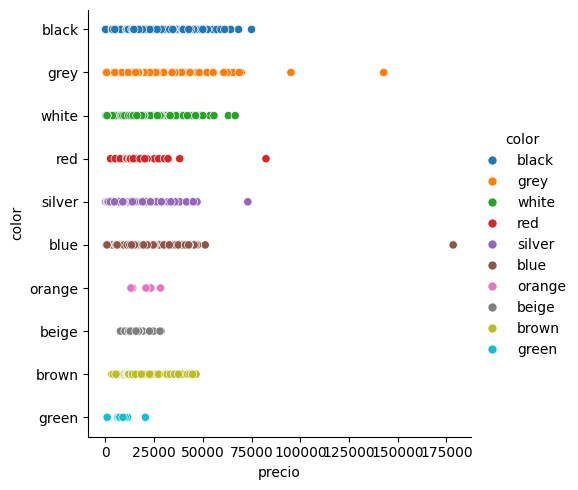

In [48]:
# Hacemos un scatter plot para anaalizar la relación entre el precio y el color del coche
sns.relplot(x="precio", y="color", hue="color", data=bmw)

In [49]:
def obtener_color_binario(x):
  if str(x) == 'nan':
    return np.nan
  elif x in ['black','grey','blue','white']:
    return 1
  else:
    return 0

In [50]:
df_bmw['color_estandar'] = df_bmw['color'].map(obtener_color_binario)
df_antes['color_estandar'] = df_antes['color'].map(obtener_color_binario)

In [51]:
COLUMNS_1 = ['modelo', 'tipo_coche', 'potencia']
df_nulls_1 = df_bmw.groupby(COLUMNS_1)['color_estandar'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_1 = df_nulls_1.dropna(subset=['color_estandar'])
df_nulls_1.rename(columns={"color_estandar":"color_estandar_1"},inplace=True)

COLUMNS_2 = ['modelo', 'tipo_coche']
df_nulls_2 = df_bmw.groupby(COLUMNS_2)['color_estandar'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_2 = df_nulls_2.dropna(subset=['color_estandar'])
df_nulls_2.rename(columns={"color_estandar":"color_estandar_2"},inplace=True)

COLUMNS_3 = ['modelo']
df_nulls_3 = df_bmw.groupby(COLUMNS_3)['color_estandar'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_3 = df_nulls_3.dropna(subset=['color_estandar'])
df_nulls_3.rename(columns={"color_estandar":"color_estandar_3"},inplace=True)

COLUMNS_4 = ['tipo_coche']
df_nulls_4 = df_bmw.groupby(COLUMNS_4)['color_estandar'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_4 = df_nulls_4.dropna(subset=['color_estandar'])
df_nulls_4.rename(columns={"color_estandar":"color_estandar_4"},inplace=True)


In [52]:
df_bmw = df_bmw.merge(df_nulls_1,how='left',left_on=COLUMNS_1,right_on=COLUMNS_1)
df_bmw = df_bmw.merge(df_nulls_2,how='left',left_on=COLUMNS_2,right_on=COLUMNS_2)
df_bmw = df_bmw.merge(df_nulls_3,how='left',left_on=COLUMNS_3,right_on=COLUMNS_3)
df_bmw = df_bmw.merge(df_nulls_4,how='left',left_on=COLUMNS_4,right_on=COLUMNS_4)

df_bmw['color_estandar'] = df_bmw[['color_estandar','color_estandar_1','color_estandar_2','color_estandar_3','color_estandar_4']].bfill(axis=1).iloc[:, 0]

df_bmw.drop(columns=['color_estandar_1','color_estandar_2','color_estandar_3','color_estandar_4'],inplace=True)

In [53]:
tabla_nulos(df_bmw).loc[['color_estandar']]

,NULOS,% NULOS,VALORES UNICOS
color_estandar,0,0.0,2


In [54]:
# Una vez imputados los nulos en la nueva variable, borramos la columna color
df_bmw.drop(columns='color', inplace=True)

# Comprobamos que la hemos eliminado
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4816 entries, 0 to 4815
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4816 non-null   object 
 1   km                           4816 non-null   float64
 2   potencia                     4816 non-null   float64
 3   tipo_coche                   4816 non-null   object 
 4   volante_regulable            4816 non-null   object 
 5   aire_acondicionado           4334 non-null   object 
 6   camara_trasera               4816 non-null   object 
 7   asientos_traseros_plegables  1444 non-null   object 
 8   elevalunas_electrico         4816 non-null   object 
 9   bluetooth                    4092 non-null   object 
 10  alerta_lim_velocidad         4095 non-null   object 
 11  precio                       4816 non-null   float64
 12  años_coche                   2408 non-null   float64
 13  color_estandar    

In [55]:
# Conteos por color (ordenados)
antes_color = df_antes['color_estandar'].value_counts().sort_index()
despues_color = df_bmw['color_estandar'].value_counts().sort_index()

# Etiquetas personalizadas para el eje X
etiquetas = {0: '0: Otros', 1: '1: Black / Grey / Blue / White'}
x_labels = [etiquetas.get(i, str(i)) for i in antes_color.index]

fig = go.Figure()

# Añadimos barras para antes
fig.add_trace(go.Bar(
    x=x_labels,
    y=antes_color.values,
    marker_color='#373485',
    name='Antes',
    text=antes_color.values,
    textposition='outside',
    opacity=1,
))

# Añadimos barras para después
fig.add_trace(go.Bar(
    x=x_labels,
    y=despues_color.reindex(antes_color.index, fill_value=0).values,
    marker_color='#c52b30',
    name='Después',
    text=despues_color.reindex(antes_color.index, fill_value=0).values,
    textposition='outside',
    opacity=1,
))

# Configuramos el layout
fig.update_layout(
    title="Distribución de COLOR antes y después de la imputación",
    xaxis_title="Tipo de color",
    barmode='group',  # Barras en paralelo
    template='plotly_white',
    width=1200,
    height=470,
    plot_bgcolor='#e6e6e7',
    paper_bgcolor='#e6e6e7',
    xaxis=dict(
        tickfont=dict(color='black'),
        title_standoff=20
    )
)

fig.show()

### **COLUMNA AÑOS COCHE**

En esta columna observamos que representa la antigüedad del vehículo, una variable que sí puede aportar valor en la predicción del precio. Sin embargo, presenta valores continuos y algunos nulos, por lo que se decide agrupar en rangos categóricos y realizar una imputación estructurada.

El proceso realizado ha sido el siguiente:

1. Inspeccionamos los valores nulos de la columna `años_coche` y analizamos su distribución, agrupándola visualmente para entender mejor los intervalos más frecuentes.

2. Transformamos la variable continua en una variable categórica utilizando `pd.cut`, dividiendo en los siguientes rangos:
   - `1-3`: vehículos muy nuevos  
   - `4-6`: seminuevos  
   - `7-10`: usados en buen estado  
   - `11-15`: usados con más desgaste  
   - `16-20`: antiguos  
   - `21-25`: muy antiguos  
   - `>25`: clásicos o muy antiguos  

3. Para imputar los valores nulos en `años_coche`, generamos cuatro tablas auxiliares agrupadas por diferentes combinaciones de variables (`modelo`, `tipo_coche`, `potencia`), obteniendo el valor más frecuente (moda) dentro de cada grupo.

4. Realizamos varios merges para añadir estas imputaciones al dataframe original y, mediante `bfill(axis=1)`, rellenamos los valores nulos desde la imputación más específica a la más general.

5. Tras completar la imputación, eliminamos las columnas auxiliares utilizadas durante el proceso.

6. Comprobamos la cantidad de valores nulos tras la imputación y validamos el resultado con un gráfico de barras comparativo que muestra la distribución de `años_coche` antes y después del tratamiento. Observamos que el rango `4-6` ha aumentado más que las demás ya que este agrupaba más del **50 %** de los registros totales sin nulos.

In [56]:
tabla_nulos(df_bmw).loc[['años_coche']]

,NULOS,% NULOS,VALORES UNICOS
años_coche,2408,50.0,23


In [57]:
distribuciones['años_coche'].sort_index()

años_coche
1.0     0.001038
2.0     0.009550
3.0     0.033631
4.0     0.131202
5.0     0.156529
6.0     0.089890
7.0     0.023874
8.0     0.010588
9.0     0.008096
10.0    0.008719
11.0    0.006020
12.0    0.006020
13.0    0.005813
14.0    0.002076
15.0    0.001661
16.0    0.000830
17.0    0.001661
18.0    0.000623
19.0    0.000623
21.0    0.000830
23.0    0.000208
24.0    0.000208
28.0    0.000208
NaN     0.500104
Name: proportion, dtype: float64

In [58]:
# Definir los rangos de edad y los nuevos valores
rangos = [0, 3, 6, 10, 15, 20, 25, 30]
nuevos_valores = ['1-3', '4-6', '7-10', '11-15', '16-20', '21-25', '>25']

# Aplicar la transformación con pd.cut
df_bmw['años_coche'] = pd.cut(df_bmw['años_coche'], bins=rangos, labels=nuevos_valores, right=True)
df_antes['edad_coche'] = pd.cut(df_antes['años_coche'], bins=rangos, labels=nuevos_valores, right=True)

In [59]:
COLUMNS_1 = ['modelo', 'tipo_coche', 'potencia']
df_nulls_1 = df_bmw.groupby(COLUMNS_1)['años_coche'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_1 = df_nulls_1.dropna(subset=['años_coche'])
df_nulls_1.rename(columns={"años_coche":"años_coche_1"},inplace=True)

COLUMNS_2 = ['modelo', 'tipo_coche']
df_nulls_2 = df_bmw.groupby(COLUMNS_2)['años_coche'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_2 = df_nulls_2.dropna(subset=['años_coche'])
df_nulls_2.rename(columns={"años_coche":"años_coche_2"},inplace=True)

COLUMNS_3 = ['modelo']
df_nulls_3 = df_bmw.groupby(COLUMNS_3)['años_coche'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_3 = df_nulls_3.dropna(subset=['años_coche'])
df_nulls_3.rename(columns={"años_coche":"años_coche_3"},inplace=True)

COLUMNS_4 = ['tipo_coche']
df_nulls_4 = df_bmw.groupby(COLUMNS_4)['años_coche'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_4 = df_nulls_4.dropna(subset=['años_coche'])
df_nulls_4.rename(columns={"años_coche":"años_coche_4"},inplace=True)

In [60]:
df_bmw = df_bmw.merge(df_nulls_1,how='left',left_on=COLUMNS_1,right_on=COLUMNS_1)
df_bmw = df_bmw.merge(df_nulls_2,how='left',left_on=COLUMNS_2,right_on=COLUMNS_2)
df_bmw = df_bmw.merge(df_nulls_3,how='left',left_on=COLUMNS_3,right_on=COLUMNS_3)
df_bmw = df_bmw.merge(df_nulls_4,how='left',left_on=COLUMNS_4,right_on=COLUMNS_4)

df_bmw['años_coche'] = df_bmw[['años_coche','años_coche_1','años_coche_2','años_coche_3','años_coche_4']].bfill(axis=1).iloc[:, 0]

df_bmw.drop(columns=['años_coche_1','años_coche_2','años_coche_3','años_coche_4'],inplace=True)

In [61]:
tabla_nulos(df_bmw).loc[['años_coche']]

,NULOS,% NULOS,VALORES UNICOS
años_coche,0,0.0,7


In [62]:
# Valores agrupados por edad/años de coche (ordenados)
antes_vals = df_antes['edad_coche'].value_counts().sort_index()
despues_vals = df_bmw['años_coche'].value_counts().sort_index()

# Convertir índices en cadenas si es necesario (para evitar problemas en el eje X)
x_labels = [str(i) for i in antes_vals.index]

fig = go.Figure()

# Añadir barras para Antes
fig.add_trace(go.Bar(
    x=x_labels,
    y=antes_vals.values,
    name='Antes',
    marker_color='#373485',
    text=antes_vals.values,
    textposition='outside',
    opacity=1,
))

# Añadir barras para Después
fig.add_trace(go.Bar(
    x=x_labels,
    y=despues_vals.reindex(antes_vals.index, fill_value=0).values,
    name='Después',
    marker_color='#c52b30',
    text=despues_vals.reindex(antes_vals.index, fill_value=0).values,
    textposition='outside',
    opacity=1,
))

# Layout
fig.update_layout(
    title="Distribución de AÑOS DE COCHE antes y después de la imputación",
    xaxis_title="Categorías de edad del coche",
    yaxis_title="Frecuencia",
    barmode='group',
    template='plotly_white',
    width=1000,
    height=470,
    plot_bgcolor='#e6e6e7',
    paper_bgcolor='#e6e6e7',
    xaxis=dict(
        tickfont=dict(color='black'),
        title_standoff=20
    )
)

fig.show()

### **COLUMNA AIRE ACONDICIONADO**

La presencia de aire acondicionado en un vehículo puede tener un impacto directo en su valoración económica, por lo que resulta relevante conservar esta variable. Sin embargo, la columna presenta algunos valores nulos que deben ser tratados para no afectar al modelo predictivo.

El proceso realizado ha sido el siguiente:

1. Inspeccionamos los valores nulos de la columna `aire_acondicionado` y analizamos su distribución para determinar la proporción de datos ausentes y valorar la necesidad de imputación.

2. Para completar los valores nulos, creamos varias tablas auxiliares agrupadas por diferentes combinaciones de variables (`modelo`, `años_coche`, `potencia`, `tipo_coche`), con el objetivo de obtener el valor más frecuente (moda) en cada grupo.

3. En los casos en los que no se pudo obtener un valor representativo a partir del agrupamiento, utilizamos la moda global de la columna como último recurso.

4. Realizamos varios merges para añadir estas imputaciones al dataframe original y aplicamos `bfill(axis=1)` para rellenar los valores nulos con la imputación más específica disponible en cada fila.

5. Una vez finalizada la imputación, eliminamos las columnas auxiliares utilizadas durante el proceso.

6. Finalmente, validamos el tratamiento comprobando los valores nulos restantes y generamos un gráfico comparativo de barras que muestra la distribución de `aire_acondicionado` antes y después de la imputación.

In [63]:
tabla_nulos(df_bmw).loc[['aire_acondicionado']]

,NULOS,% NULOS,VALORES UNICOS
aire_acondicionado,482,10.008306,2


In [64]:
distribuciones['aire_acondicionado']

aire_acondicionado
True     0.715591
False    0.184347
NaN      0.100062
Name: proportion, dtype: float64

In [65]:
COLUMNS_1 = ['modelo','años_coche']
df_nulls_1 = df_bmw.groupby(COLUMNS_1)['aire_acondicionado'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_1 = df_nulls_1.dropna(subset=['aire_acondicionado'])
df_nulls_1.rename(columns={"aire_acondicionado":"aire_acondicionado_1"},inplace=True)

COLUMNS_2 = ['modelo','potencia']
df_nulls_2 = df_bmw.groupby(COLUMNS_2)['aire_acondicionado'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_2 = df_nulls_2.dropna(subset=['aire_acondicionado'])
df_nulls_2.rename(columns={"aire_acondicionado":"aire_acondicionado_2"},inplace=True)

COLUMNS_3 = ['modelo']
df_nulls_3 = df_bmw.groupby(COLUMNS_3)['aire_acondicionado'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_3 = df_nulls_3.dropna(subset=['aire_acondicionado'])
df_nulls_3.rename(columns={"aire_acondicionado":"aire_acondicionado_3"},inplace=True)

COLUMNS_4 = ['tipo_coche']
moda_global = df_bmw['aire_acondicionado'].mode().iloc[0]
df_nulls_4 = df_bmw[df_bmw['aire_acondicionado'].isna()][['tipo_coche']].dropna().drop_duplicates()
df_nulls_4['aire_acondicionado_4'] = moda_global

In [66]:
df_bmw = df_bmw.merge(df_nulls_1,how='left',left_on=COLUMNS_1,right_on=COLUMNS_1)
df_bmw = df_bmw.merge(df_nulls_2,how='left',left_on=COLUMNS_2,right_on=COLUMNS_2)
df_bmw = df_bmw.merge(df_nulls_3,how='left',left_on=COLUMNS_3,right_on=COLUMNS_3)
df_bmw = df_bmw.merge(df_nulls_4,how='left',left_on=COLUMNS_4,right_on=COLUMNS_4)

df_bmw['aire_acondicionado'] = df_bmw[['aire_acondicionado','aire_acondicionado_1','aire_acondicionado_2','aire_acondicionado_3','aire_acondicionado_4']].bfill(axis=1).iloc[:, 0]

df_bmw.drop(columns=['aire_acondicionado_1','aire_acondicionado_2','aire_acondicionado_3','aire_acondicionado_4'],inplace=True)

In [67]:
tabla_nulos(df_bmw).loc[['aire_acondicionado']]

,NULOS,% NULOS,VALORES UNICOS
aire_acondicionado,0,0.0,2


In [68]:
# Conteo antes y después
antes_ac = df_antes['aire_acondicionado'].value_counts().sort_index()
despues_ac = df_bmw['aire_acondicionado'].value_counts().sort_index()

# Diccionario para etiquetas personalizadas
etiquetas = {False: 'No', True: 'Sí'}

# Etiquetas del eje X ordenadas como en 'antes_ac'
x_labels = [etiquetas.get(i, str(i)) for i in antes_ac.index]

# Asegurar que los valores de después están en el mismo orden
despues_vals = despues_ac.reindex(antes_ac.index, fill_value=0).values

fig = go.Figure()

# Antes
fig.add_trace(go.Bar(
    x=x_labels,
    y=antes_ac.values,
    name='Antes',
    marker_color='#373485',
    text=antes_ac.values,
    textposition='outside',
    opacity=1
))

# Después
fig.add_trace(go.Bar(
    x=x_labels,
    y=despues_vals,
    name='Después',
    marker_color='#c52b30',
    text=despues_vals,
    textposition='outside',
    opacity=1
))

fig.update_layout(
    title="Distribución de AIRE ACONDICIONADO antes y después de la imputación",
    xaxis_title="Aire acondicionado",
    yaxis_title="Frecuencia",
    barmode='group',
    template='plotly_white',
    width=1200,
    height=470,
    plot_bgcolor='#e6e6e7',
    paper_bgcolor='#e6e6e7',
    xaxis=dict(
        tickfont=dict(color='black'),
        title_standoff=20
    )
)

fig.show()

### **COLUMNA BLUETOOTH**

La disponibilidad de conexión Bluetooth en un vehículo representa una funcionalidad tecnológica valorada por los usuarios y, por tanto, puede influir en el precio final. Sin embargo, esta variable contiene valores nulos que es necesario imputar para no comprometer la calidad del modelo.

El proceso realizado ha sido el siguiente:

1. Inspeccionamos los valores nulos de la columna `bluetooth` y visualizamos su distribución para comprender la magnitud del problema y determinar si el patrón de ausencia tenía alguna relación con otras variables.

2. Creamos cinco tablas auxiliares agrupadas por diferentes combinaciones de variables que podían estar asociadas a la presencia de Bluetooth (`modelo`, `potencia`, `tipo_coche`, `aire_acondicionado`, `asientos_traseros_plegables`, `elevalunas_electrico`, `años_coche`), extrayendo en cada caso la moda como valor representativo.

3. Para los registros en los que no se pudo imputar el valor con ninguna de las combinaciones anteriores, asignamos la moda global de la columna como imputación final.

4. Unimos progresivamente las tablas auxiliares al dataset original mediante `merge`, y utilizamos la función `bfill(axis=1)` para completar los valores nulos en la columna `bluetooth`, comenzando por la imputación más específica y terminando con la más general.

5. Eliminamos las columnas auxiliares generadas para dejar únicamente la variable `bluetooth` ya imputada en el dataframe final.

6. Finalmente, validamos el proceso comprobando que no quedaban valores nulos y generamos un gráfico de barras comparativo que muestra la distribución de `bluetooth` antes y después de la imputación, permitiendo verificar visualmente la coherencia del tratamiento realizado.

In [69]:
tabla_nulos(df_bmw).loc[['bluetooth']]

,NULOS,% NULOS,VALORES UNICOS
bluetooth,724,15.033223,2


In [70]:
distribuciones['bluetooth']

bluetooth
False    0.643762
True     0.205730
NaN      0.150509
Name: proportion, dtype: float64

In [71]:
COLUMNS_1 = ['años_coche','tipo_coche','modelo','potencia', 'asientos_traseros_plegables', 'aire_acondicionado']
df_nulls_1 = df_bmw.groupby(COLUMNS_1)['bluetooth'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_1 = df_nulls_1.dropna(subset=['bluetooth'])
df_nulls_1.rename(columns={"bluetooth":"bluetooth_1"},inplace=True)

COLUMNS_2 = ['modelo', 'asientos_traseros_plegables', 'aire_acondicionado']
df_nulls_2 = df_bmw.groupby(COLUMNS_2)['bluetooth'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_2 = df_nulls_2.dropna(subset=['bluetooth'])
df_nulls_2.rename(columns={"bluetooth":"bluetooth_2"},inplace=True)

COLUMNS_3 = ['modelo','elevalunas_electrico']
df_nulls_3 = df_bmw.groupby(COLUMNS_3)['bluetooth'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_3 = df_nulls_3.dropna(subset=['bluetooth'])
df_nulls_3.rename(columns={"bluetooth":"bluetooth_3"},inplace=True)

COLUMNS_4 = ['modelo']
df_nulls_4 = df_bmw.groupby(COLUMNS_4)['bluetooth'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_4 = df_nulls_4.dropna(subset=['bluetooth'])
df_nulls_4.rename(columns={"bluetooth":"bluetooth_4"},inplace=True)

COLUMNS_5 = ['tipo_coche']
moda_global = df_bmw['bluetooth'].mode().iloc[0]
df_nulls_5 = df_bmw[df_bmw['bluetooth'].isna()][['tipo_coche']].dropna().drop_duplicates()
df_nulls_5['bluetooth_5'] = moda_global

In [72]:
assert not df_nulls_1.duplicated(subset=COLUMNS_1).any(), "Duplicados en df_nulls_1"
assert not df_nulls_2.duplicated(subset=COLUMNS_2).any(), "Duplicados en df_nulls_2"
assert not df_nulls_3.duplicated(subset=COLUMNS_3).any(), "Duplicados en df_nulls_3"
assert not df_nulls_4.duplicated(subset=COLUMNS_4).any(), "Duplicados en df_nulls_4"
assert not df_nulls_5.duplicated(subset=COLUMNS_5).any(), "Duplicados en df_nulls_5"

In [73]:
df_bmw = df_bmw.merge(df_nulls_1,how='left',left_on=COLUMNS_1,right_on=COLUMNS_1)
df_bmw = df_bmw.merge(df_nulls_2,how='left',left_on=COLUMNS_2,right_on=COLUMNS_2)
df_bmw = df_bmw.merge(df_nulls_3,how='left',left_on=COLUMNS_3,right_on=COLUMNS_3)
df_bmw = df_bmw.merge(df_nulls_4,how='left',left_on=COLUMNS_4,right_on=COLUMNS_4)
df_bmw = df_bmw.merge(df_nulls_5,how='left',left_on=COLUMNS_5,right_on=COLUMNS_5)

df_bmw['bluetooth'] = df_bmw[['bluetooth','bluetooth_1','bluetooth_2','bluetooth_3','bluetooth_4','bluetooth_5']].bfill(axis=1).iloc[:, 0]

df_bmw.drop(columns=['bluetooth_1','bluetooth_2','bluetooth_3','bluetooth_4','bluetooth_5'],inplace=True)

In [74]:
tabla_nulos(df_bmw).loc[['bluetooth']]

,NULOS,% NULOS,VALORES UNICOS
bluetooth,0,0.0,2


In [75]:
import plotly.graph_objects as go

# Conteo antes y después
antes_bt = df_antes['bluetooth'].value_counts().sort_index()
despues_bt = df_bmw['bluetooth'].value_counts().sort_index()

# Diccionario para etiquetas personalizadas
etiquetas = {False: 'No', True: 'Sí'}

# Etiquetas del eje X ordenadas igual que en antes_bt
x_labels = [etiquetas.get(i, str(i)) for i in antes_bt.index]

# Valores de después en el mismo orden que antes
despues_vals = despues_bt.reindex(antes_bt.index, fill_value=0).values

fig = go.Figure()

# Antes
fig.add_trace(go.Bar(
    x=x_labels,
    y=antes_bt.values,
    name='Antes',
    marker_color='#373485',
    text=antes_bt.values,
    textposition='outside',
    opacity=1
))

# Después
fig.add_trace(go.Bar(
    x=x_labels,
    y=despues_vals,
    name='Después',
    marker_color='#c52b30',
    text=despues_vals,
    textposition='outside',
    opacity=1
))

fig.update_layout(
    title="Distribución de BLUETOOTH antes y después de la imputación",
    xaxis_title="Bluetooth",
    yaxis_title="Frecuencia",
    barmode='group',
    template='plotly_white',
    width=1200,
    height=470,
    plot_bgcolor='#e6e6e7',
    paper_bgcolor='#e6e6e7',
    xaxis=dict(
        tickfont=dict(color='black'),
        title_standoff=20
    )
)

fig.show()

### **COLUMNA ALERTA LIMITE VELOCIDAD**

La presencia del sistema de alerta de límite de velocidad es una característica de asistencia a la conducción que puede incidir en el precio del coche. Dado que esta variable contiene valores nulos, hemos decidido imputarlos de forma coherente con el comportamiento del resto del dataset.

El proceso que hemos llevado a cabo es el siguiente:

1. Revisamos el porcentaje de valores ausentes en la columna y consultamos su distribución para entender el contexto.

2. Creamos tres tablas auxiliares con imputaciones por moda según distintos niveles de agrupación:
   - La primera agrupa por `potencia` y `km`, para captar similitudes mecánicas y de uso.
   - La segunda agrupa por `modelo` y `potencia`, teniendo en cuenta la gama del vehículo.
   - La tercera agrupa por `tipo_coche` y asigna la moda global como último recurso.

3. Unimos estas imputaciones al dataframe original utilizando la función `bfill(axis=1)`, asignamos a cada fila con valor nulo el primer valor disponible.

4. Eliminamos las columnas auxiliares que hemos creado para dejar limpia la estructura final del dataframe.

5. Comprobamos que ya no quedan valores nulos y generamos una visualización que compara la distribución de la variable antes y después de la imputación, asegurándonos de que el reparto original se mantiene sin grandes alteraciones.

In [76]:
tabla_nulos(df_bmw).loc[['alerta_lim_velocidad']]

,NULOS,% NULOS,VALORES UNICOS
alerta_lim_velocidad,721,14.97093,2


In [77]:
distribuciones['alerta_lim_velocidad']

alerta_lim_velocidad
True     0.462529
False    0.387586
NaN      0.149886
Name: proportion, dtype: float64

In [78]:
COLUMNS_1 = ['potencia', 'km']
df_nulls_1 = df_bmw.groupby(COLUMNS_1)['alerta_lim_velocidad'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_1 = df_nulls_1.dropna(subset=['alerta_lim_velocidad'])
df_nulls_1.rename(columns={"alerta_lim_velocidad":"alerta_lim_velocidad_1"},inplace=True)

COLUMNS_2 = ['modelo', 'potencia']
df_nulls_2 = df_bmw.groupby(COLUMNS_2)['alerta_lim_velocidad'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_2 = df_nulls_2.dropna(subset=['alerta_lim_velocidad'])
df_nulls_2.rename(columns={"alerta_lim_velocidad":"alerta_lim_velocidad_2"},inplace=True)

COLUMNS_3 = ['tipo_coche']
moda_global = df_bmw['alerta_lim_velocidad'].mode().iloc[0]
df_nulls_3 = df_bmw[df_bmw['alerta_lim_velocidad'].isna()][['tipo_coche']].dropna().drop_duplicates()
df_nulls_3['alerta_lim_velocidad_3'] = moda_global

In [79]:
df_bmw = df_bmw.merge(df_nulls_1,how='left',left_on=COLUMNS_1,right_on=COLUMNS_1)
df_bmw = df_bmw.merge(df_nulls_2,how='left',left_on=COLUMNS_2,right_on=COLUMNS_2)
df_bmw = df_bmw.merge(df_nulls_3,how='left',left_on=COLUMNS_3,right_on=COLUMNS_3)

df_bmw['alerta_lim_velocidad'] = df_bmw[['alerta_lim_velocidad','alerta_lim_velocidad_1','alerta_lim_velocidad_2','alerta_lim_velocidad_3']].bfill(axis=1).iloc[:, 0]

df_bmw.drop(columns=['alerta_lim_velocidad_1','alerta_lim_velocidad_2','alerta_lim_velocidad_3'],inplace=True)

In [80]:
tabla_nulos(df_bmw).loc[['alerta_lim_velocidad']]

,NULOS,% NULOS,VALORES UNICOS
alerta_lim_velocidad,0,0.0,2


In [81]:
# Conteo antes y después
antes_alerta = df_antes['alerta_lim_velocidad'].value_counts().sort_index()
despues_alerta = df_bmw['alerta_lim_velocidad'].value_counts().sort_index()

# Diccionario para etiquetas personalizadas
etiquetas = {False: 'No', True: 'Sí'}

# Convertir índices a etiquetas personalizadas
x_labels_antes = [etiquetas.get(i, str(i)) for i in antes_alerta.index]
x_labels_despues = [etiquetas.get(i, str(i)) for i in despues_alerta.index]

fig = go.Figure()

fig.add_trace(go.Bar(
    x=x_labels_antes,
    y=antes_alerta.values,
    name='Antes',
    marker_color='#373485',
    opacity=1,
    text=antes_alerta.values,
    textposition='outside'
))

fig.add_trace(go.Bar(
    x=x_labels_despues,
    y=despues_alerta.values,
    name='Después',
    marker_color='#c52b30',
    opacity=1,
    text=despues_alerta.values,
    textposition='outside'
))

fig.update_layout(
    title="Distribución de ALERTA LÍMITE DE VELOCIDAD antes y después de la imputación",
    xaxis_title="Alerta límite velocidad",
    barmode='group',
    template='plotly_white',
    width=800,
    height=470,
    plot_bgcolor='#e6e6e7', 
    paper_bgcolor='#e6e6e7'
)

fig.show()

### **COLUMNA ASIENTOS TRASEROS PLEGABLES**

La columna **asientos traseros plegables** presenta un alto porcentaje de valores nulos, aproximadamente un **70 %**, lo que disminuye la fiabilidad de esta variable. Además, si imputásemos los valores ausentes utilizando la moda (teniendo en cuenta que el **80 %** de los valores no nulos son `False`), la distribución resultante quedaría muy desbalanceada, con más del **90 %** de un único valor. Esto haría que la variable aportase poca o ninguna información relevante para el modelo.

Por este motivo, decidimos eliminar la columna para evitar introducir ruido o sesgos en el análisis.

El proceso que hemos seguido es el siguiente:

1. Revisamos el porcentaje de valores ausentes en la columna y su distribución para evaluar su calidad.

2. Analizamos la distribución tras una posible imputación con la moda y observamos que la variable perdería su capacidad informativa.

3. Decidimos eliminar la columna para mantener la calidad del dataset.

4. Verificamos que la columna se haya eliminado correctamente del dataframe.

In [82]:
tabla_nulos(df_bmw).loc[['asientos_traseros_plegables']]

,NULOS,% NULOS,VALORES UNICOS
asientos_traseros_plegables,3372,70.016611,2


In [83]:
distribuciones['asientos_traseros_plegables']

asientos_traseros_plegables
NaN      0.700228
False    0.237285
True     0.062487
Name: proportion, dtype: float64

In [84]:
# Borramos la columna 'asientos_traseros_plegables'
df_bmw.drop(columns='asientos_traseros_plegables', inplace=True)

# Comprobamos que se han eliminado correctamente
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4816 entries, 0 to 4815
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   modelo                4816 non-null   object  
 1   km                    4816 non-null   float64 
 2   potencia              4816 non-null   float64 
 3   tipo_coche            4816 non-null   object  
 4   volante_regulable     4816 non-null   object  
 5   aire_acondicionado    4816 non-null   bool    
 6   camara_trasera        4816 non-null   object  
 7   elevalunas_electrico  4816 non-null   object  
 8   bluetooth             4816 non-null   bool    
 9   alerta_lim_velocidad  4816 non-null   bool    
 10  precio                4816 non-null   float64 
 11  años_coche            4816 non-null   category
 12  color_estandar        4816 non-null   float64 
dtypes: bool(3), category(1), float64(4), object(5)
memory usage: 357.9+ KB


In [85]:
tabla_nulos(df_bmw)

,NULOS,% NULOS,VALORES UNICOS
modelo,0,0.0,76
km,0,0.0,4759
potencia,0,0.0,59
tipo_coche,0,0.0,8
volante_regulable,0,0.0,2
aire_acondicionado,0,0.0,2
camara_trasera,0,0.0,2
elevalunas_electrico,0,0.0,2
bluetooth,0,0.0,2
alerta_lim_velocidad,0,0.0,2


## **05 - ANÁLISIS EXPLORATORIO (EDA)**

In [86]:
df_bmw.head()

,modelo,km,potencia,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,años_coche,color_estandar
0,118,140411.0,100.0,coupe,True,True,False,True,True,False,11300.0,4-6,1.0
1,M4,13929.0,317.0,convertible,True,True,False,False,True,True,69700.0,1-3,1.0
2,320,183297.0,120.0,sedan,False,False,False,True,False,False,10200.0,4-6,1.0
3,420,128035.0,135.0,convertible,True,True,False,True,True,False,25100.0,4-6,0.0
4,425,97097.0,160.0,coupe,True,True,False,False,True,True,33400.0,4-6,0.0


### **5.1 - ANÁLISIS UNIVARIABLE**

#### **VARIABLES NÚMERICAS**


##### **KM**

<p align="center" style="font-size:16px;">
  <b>Media:</b> <span style="color:#e76f51;">140,931 km</span> &nbsp;&nbsp;|&nbsp;&nbsp; 
  <b>Mediana:</b> <span style="color:#e76f51;">140,948 km</span> &nbsp;&nbsp;|&nbsp;&nbsp; 
  <b>Rango:</b> <span style="color:#e76f51;">476 km – 1,000,376 km</span>
</p>

---

<p style="max-width:1200px; margin:auto; line-height:1.5; text-align: justify;">
La variable kilometraje (km) representa la distancia total recorrida por cada vehículo registrado. En nuestro análisis, el kilometraje tiene una media de aproximadamente 140,931 km y una mediana muy cercana, 140,948 km, lo que indica una distribución bastante equilibrada y sin sesgos fuertes.<br><br>
El rango de valores va desde un mínimo de 476 km hasta un máximo excepcional de más de 1,000,000 km, aunque este último se consideró un valor atípico extremo y se eliminó para preservar la calidad del análisis. La mayoría de los vehículos (75%) tienen menos de 175,239 km, lo que sugiere que el dataset contiene principalmente coches con un kilometraje moderado.<br><br>
Los valores muy altos (superiores a 400,000 km) son poco frecuentes y fueron revisados para asegurar que reflejan datos coherentes, manteniendo así la fiabilidad del estudio.
</p>

In [87]:
df_bmw['km'].describe().round()

count       4816.0
mean      140931.0
std        60178.0
min          476.0
25%       102832.0
50%       140948.0
75%       175239.0
max      1000376.0
Name: km, dtype: float64

In [88]:
# Comprobamos cuantos coches tienen más de 400.000 km
df_bmw[df_bmw['km'] > 400000]

,modelo,km,potencia,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,años_coche,color_estandar
541,520,484615.0,120.0,estate,True,True,False,False,False,False,8300.0,7-10,1.0
1553,320,400654.0,110.0,estate,False,False,True,False,False,False,1800.0,11-15,1.0
2328,318,477571.0,85.0,sedan,False,True,False,False,True,False,1200.0,16-20,1.0
2807,525,439060.0,105.0,estate,False,False,True,False,False,False,100.0,21-25,0.0
3175,320,405816.0,100.0,sedan,False,False,False,False,False,False,500.0,16-20,1.0
3709,118,1000376.0,90.0,hatchback,True,False,False,False,False,False,1400.0,11-15,1.0


In [ ]:
# Calculamos los límites para detectar outliers en la columna 'km' utilizando el método del rango intercuartílico (IQR)
Q1 = df_bmw['km'].quantile(0.25)
Q3 = df_bmw['km'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers_km = df_bmw[(df_bmw['km'] < limite_inferior) | (df_bmw['km'] > limite_superior)]

print(f"El limite inferior es {limite_inferior} y el limite superior es {limite_superior}")
print(f"Número de outliers en km: {len(outliers_km)}")

El limite inferior es -5780.125 y el limite superior es 283850.875
Número de outliers en km: 96


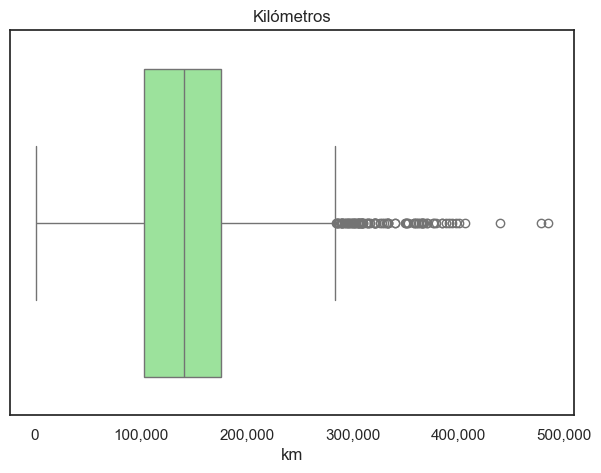

In [152]:
# Visualización de boxplot para visualizar los outliers en la columna 'km'
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.boxplot(x=df_bmw['km'], color='lightgreen')
plt.title('Kilómetros')
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()

In [ ]:
# Comprobamos el número de registros de BMW que tienen el modelo '118', para deidir si borrar el outlier
len(df_bmw[df_bmw["modelo"]=="118"])

143

In [92]:
# Buscamos el indice del registro con más de 1.000.000 km
indice_outlier_km = df_bmw[df_bmw['km'] > 1000000].index
# Eliminamos el registro con más de 1.000.000 km
df_bmw = df_bmw.drop(index=indice_outlier_km)

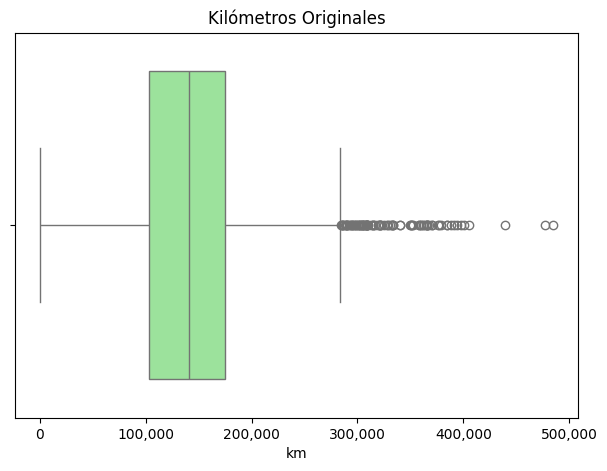

In [93]:
# Visualización para comparar antes y después
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.boxplot(x=df_bmw['km'], color='lightgreen')
plt.title('Kilómetros Originales')
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()

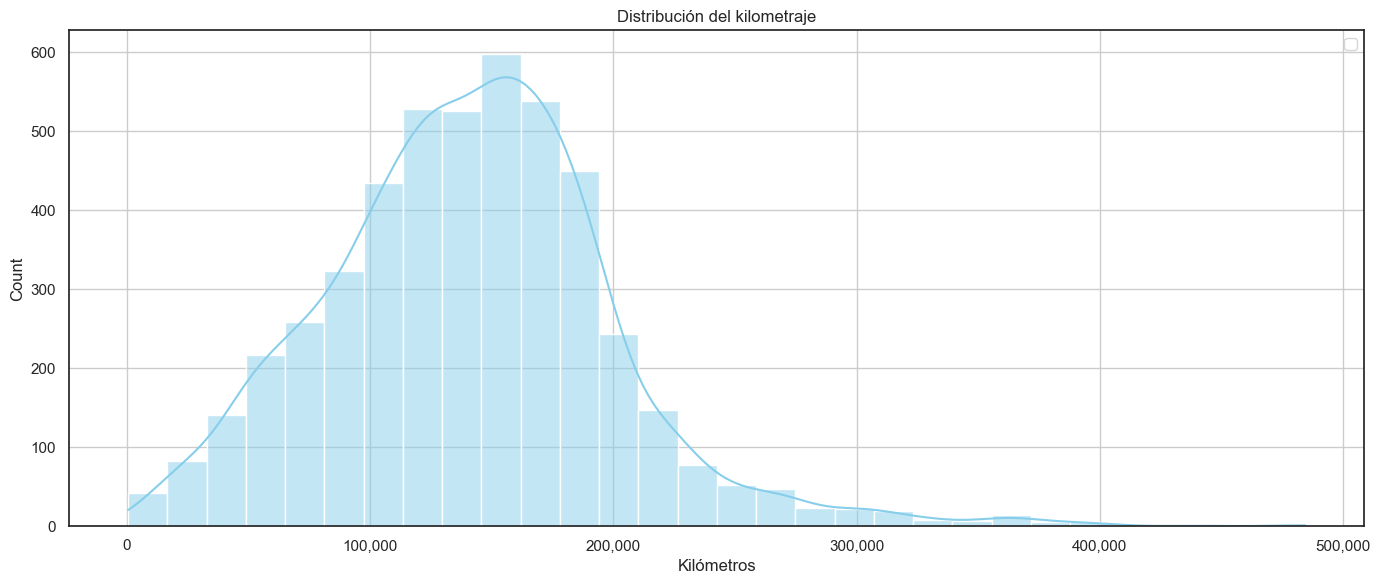

In [151]:
plt.figure(figsize=(14, 6))
sns.histplot(df_bmw['km'], bins=30, kde=True, color='skyblue')

# Título y etiquetas
plt.title('Distribución del kilometraje')
plt.xlabel('Kilómetros')
plt.legend()
plt.grid(True)

# Formato del eje X con separador de miles
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()

##### ****

In [95]:
target = 'precio'
features = df_bmw.columns[df_bmw.columns != target]

In [96]:
def obtener_lista_variables(dataset):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]

    for i in dataset:
        if    (dataset[i].dtype.kind in ("f","i")) and len(dataset[i].unique())!= 2  and i not in target:
              lista_numericas.append(i)
        elif  (dataset[i].dtype.kind in ("f","i")) and len(dataset[i].unique())== 2  and i not in target:
              lista_boolean.append(i)
        elif  (dataset[i].dtype.kind == "O")  and i not in target:
              lista_categoricas.append(i)
                
    return lista_numericas, lista_boolean, lista_categoricas

In [97]:
lista_numericas, lista_boolean, lista_categoricas= obtener_lista_variables(df_bmw)

In [98]:
print("La variables numericas son: ", lista_numericas)
print("La variables booleanas son: ", lista_boolean)
print("La variables categoricas son: ", lista_categoricas)

La variables numericas son:  ['km', 'potencia']
La variables booleanas son:  ['color_estandar']
La variables categoricas son:  ['modelo', 'tipo_coche', 'volante_regulable', 'camara_trasera', 'elevalunas_electrico', 'años_coche']


In [99]:
# Hacemos print del total de cada uno de los valores únicos de cada columna
for column in lista_categoricas:
    print("#" * 40,'\n',df_bmw[column].value_counts())
    

######################################## 
 modelo
320                747
520                629
318                565
X3                 437
116                358
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: count, Length: 76, dtype: int64
######################################## 
 tipo_coche
estate         1730
suv            1058
sedan          1033
hatchback       732
coupe           101
subcompact       80
van              41
convertible      40
Name: count, dtype: int64
######################################## 
 volante_regulable
True     2649
False    2166
Name: count, dtype: int64
######################################## 
 camara_trasera
False    3844
True      971
Name: count, dtype: int64
######################################## 
 elevalunas_electrico
False    2597
True     2218
Name: count, dtype: int64
######################################## 
 años_coche
4-6      3892
1-3   

In [100]:
def dist_box(df_bmw):
    Name=df_bmw.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(nrows=2,sharex=True,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=df_bmw.mean()
    median=df_bmw.median()
    mode=df_bmw.mode().tolist()[0]
    sns.set_theme(style="white")
    sns.set_palette(sns.color_palette("Set1", 8))
    fig.suptitle("DISPERSIÓN DE DATOS PARA "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=df_bmw,showmeans=True, orient='h',ax=ax_box)
    ax_box.set(xlabel='')
    sns.set_palette(sns.color_palette("Set1", 8))
    sns.histplot(df_bmw,kde=False,ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Media':mean,'Mediana':median,'Moda':mode})
list_col= df_bmw.select_dtypes(include='number').columns.to_list()

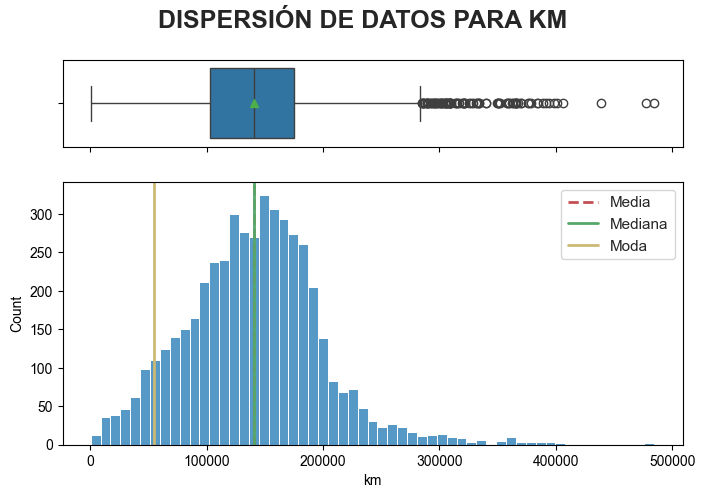

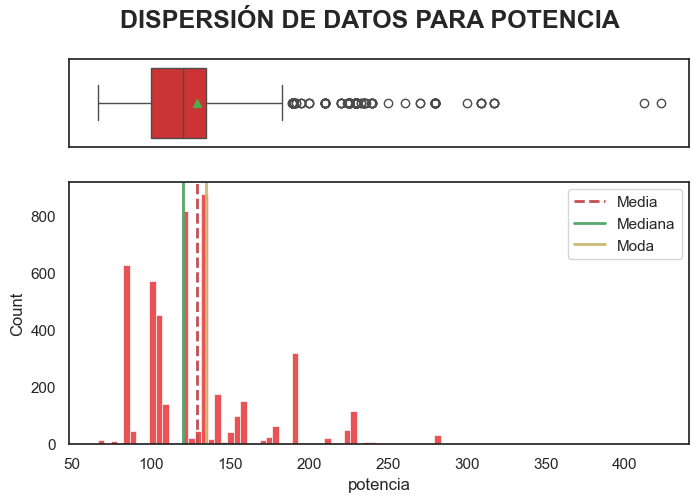

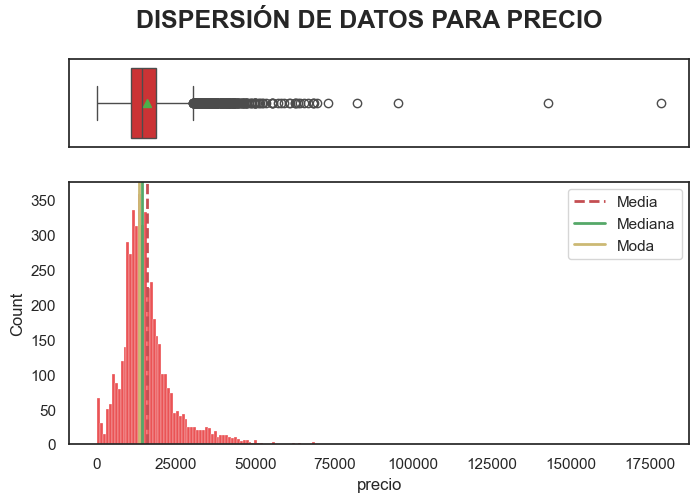

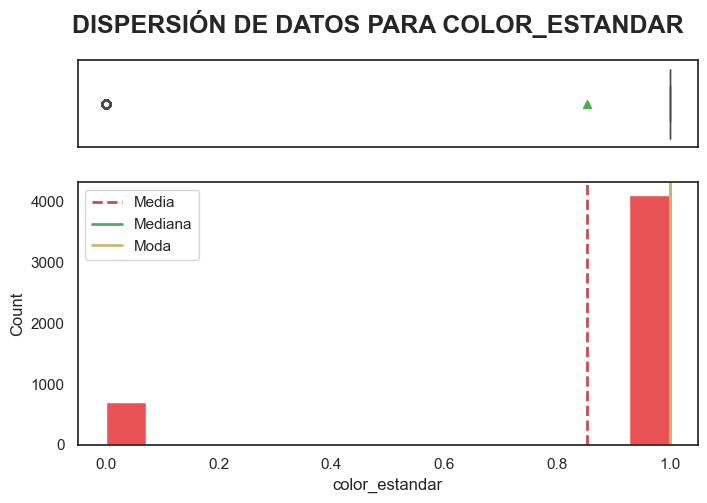

In [101]:
for i in range(len(list_col)):
    dist_box(df_bmw[list_col[i]])

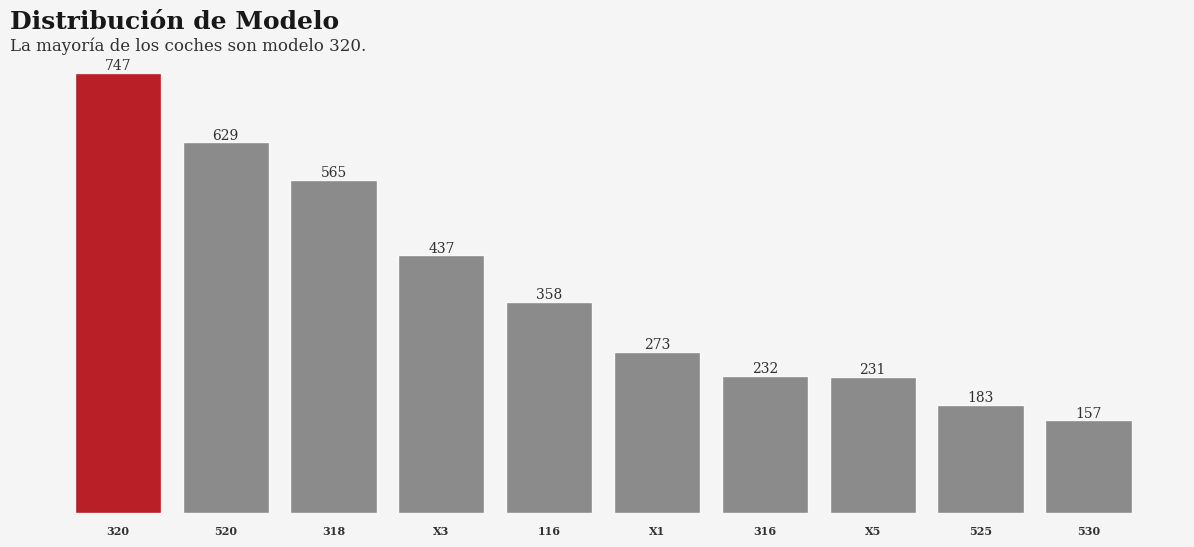

In [102]:
fig, ax = plt.subplots(figsize=(15,6))
ax.set_facecolor('#f6f5f5')
fig.patch.set_facecolor('#f6f5f5')

# Seleccionar los 10 modelos más comunes
a = df_bmw['modelo'].value_counts().head(10)

colors = ['#b20710'] + ['grey']*(len(a)-1)
ax.bar(x=a.index, height=a.values, color=colors, alpha=0.9)

# Añadir texto con el valor encima de cada barra
for i, v in enumerate(a.values):
    ax.text(i, v + 5, str(v), ha='center', fontdict={'font': 'serif', 'weight': 'normal', 'color': 'black', 'fontsize': 10}, alpha=0.8)

ax.text(-1, max(a.values) + max(a.values)*0.1, 'Distribución de Modelo', 
        fontdict={'font': 'serif', 'color': 'black', 'fontsize': 18, 'weight':'bold'}, alpha=0.9)
ax.text(-1, max(a.values) + max(a.values)*0.05, 'La mayoría de los coches son modelo 320.', 
        fontdict={'font': 'serif', 'color': 'black', 'fontsize': 12}, alpha=0.8)

for loc in ['left','right','top','bottom']:
    ax.spines[loc].set_visible(False)

ax.set_xticklabels(a.index, fontdict={'font': 'serif', 'color': 'black', 'fontsize': 8, 'weight':'bold'}, alpha=0.8)
ax.axes.get_yaxis().set_visible(False)

plt.show()

### **5.2 CORRELACIÓN INCIAL**

In [103]:
df_bmw

,modelo,km,potencia,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,años_coche,color_estandar
0,118,140411.0,100.0,coupe,True,True,False,True,True,False,11300.0,4-6,1.0
1,M4,13929.0,317.0,convertible,True,True,False,False,True,True,69700.0,1-3,1.0
2,320,183297.0,120.0,sedan,False,False,False,True,False,False,10200.0,4-6,1.0
3,420,128035.0,135.0,convertible,True,True,False,True,True,False,25100.0,4-6,0.0
4,425,97097.0,160.0,coupe,True,True,False,False,True,True,33400.0,4-6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4811,218 Gran Tourer,39743.0,110.0,van,False,True,False,False,False,False,14600.0,1-3,1.0
4812,218 Active Tourer,49832.0,100.0,van,False,True,False,False,False,True,17500.0,1-3,1.0
4813,218 Gran Tourer,19633.0,110.0,van,False,True,False,False,False,True,17000.0,1-3,1.0
4814,218 Active Tourer,27920.0,110.0,van,True,True,False,False,False,True,22700.0,1-3,0.0


In [104]:
corr = df_bmw.corr(numeric_only=True)  
corr.style.background_gradient(cmap='coolwarm')

,km,potencia,aire_acondicionado,bluetooth,alerta_lim_velocidad,precio,color_estandar
km,1.000000,-0.047223,0.004084,-0.037176,-0.038748,-0.413304,-0.000655
potencia,-0.047223,1.000000,0.186468,0.224750,0.511987,0.640025,0.036545
aire_acondicionado,0.004084,0.186468,1.000000,0.105972,0.218136,0.240172,0.004007
bluetooth,-0.037176,0.224750,0.105972,1.000000,0.097335,0.198586,0.041029
alerta_lim_velocidad,-0.038748,0.511987,0.218136,0.097335,1.000000,0.449126,0.024946
precio,-0.413304,0.640025,0.240172,0.198586,0.449126,1.000000,0.031485
color_estandar,-0.000655,0.036545,0.004007,0.041029,0.024946,0.031485,1.000000


### **5.3 VARIABLES VS TARGET (`PRECIO`)** 

## **06 - TRANSFORMACIÓN DE VARIABLES**

### **6.1 - CODIFICACIÓN DE VARIABLES**

### **6.2 - ESCALADO (MINMAXSCALER)**

### **6.3 - CORRELACIÓN FINAL**

## **07 - DATASET FINAL**

### **7.1 - INFO()**

### **7.2 - EXPORTACIÓN DE PRIMERAS 50 FILAS A EXCEL**